# Assignment 2: DNA Sequence Alignment
## Prepared by: Noha Ihab 17P815

In [1]:
#Import necessary libraries
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Global Alignment
## 1. Dot matrix using Window Scoring
### In the dot matrix algorithm, one sequence is placed on the horizontal axis, and the other on the vertical axis. In this implementation, we use window scoring to reduce noise. One subsequence from the vertical axis of window size is compared to all possible subsequences of window size from the horizontal axis. If the similarity between them is greater than the given threshold, a dot is placed on the matrix. Then, we proceed to the next subsequence on the vertical axis and repeat the process. When we reach the end, the alignment is revealed by the dots that form diagonal lines.

### Function signature: dot_plot(seq1,seq2,step=3,window=9,threshold=4)
### Arguments:
#### seq1 : The first sequence of type Seq to be placed on the horizontal axis of size M
#### seq2: The second sequence of type Seq to be placed on the vertical axis of size N
#### step: The number of residues to move the window by in each iteration, default value: 3
#### window: The number of residues in a window, default value: 9
#### threshold: the number of minimum similar residues required to add a dot to the matrix, default value: 4

In [2]:
#plotting helper function for dot plot
def dot_matplot(seq1,seq2,dots):
    figure = plt.figure()
    axes = figure.add_subplot(111)
    axes.matshow(dots,cmap='binary')
    axes.set_xticks(list(range(len(seq1))))
    axes.set_yticks(list(range(len(seq2))))
    axes.set_xticklabels(list(seq1))
    axes.set_yticklabels(list(seq2))
    plt.title('Dot plot using window scoring',y=1.1)


In [3]:
def dot_plot(seq1,seq2,step=3,window=9,threshold=4):
    dots=np.zeros(shape=(len(seq1),len(seq2))) #initilaize 2d array of zeros with size MxN
    seq1,seq2=str(seq1),str(seq2)
    
    #initialize variables
    step=step
    win_size=window
    thresh=threshold
    
    #start iterating on DNA sequences
    for x in range(0,len(seq1)-win_size+1,step):
        a=seq1[x:x+win_size] #define subsequence 1
        for y in range(0,len(seq2)-win_size+1,step):
            count=0 #initialize number of similar residues to 0
            b=seq2[y:y+win_size] #define subsequence 2
            for i in range(len(a)):
                if a[i]==b[i]: #check on similarity between two residues
                    count+=1 #if they ar similar increment the count
            if count>=thresh: #compare count against threshold
                midx,midy=int(x+win_size/2),int(y+win_size/2) #prepare dot coordinates
                dots[midx,midy]=1 #add a dot to the matrix
    #call helper function to plot the matrix
    dot_matplot(seq1,seq2,dots)
            

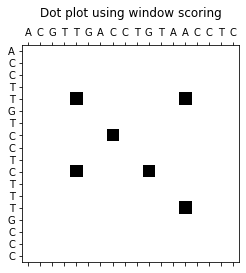

In [4]:
#testing dotplot function
Seq1=Seq('ACGTTGACCTGTAACCTC')
Seq2=Seq('ACCTTGTCCTCTTTGCCC')
dot_plot(Seq1,Seq2)

## 2. Needleman Wunch
### This strategy is suitable for aligning two closely related sequences that are of the same length. It produces optimal alignment over the entire length of two sequences. 
### Function signature: needleman_wunch(seq1,seq2,match=2,mismatch=-1,gap=-1)
### Arguments:
#### seq1 : The first sequence of type Seq to be placed on the horizontal axis of size M
#### seq2: The second sequence of type Seq to be placed on the vertical axis of size N
#### match: the match score, defalut value: 2
#### mismatch: the mismatch penalty, default value: -1
#### gap: the gap penalty (vertical or horizontal), default value: -1
### Returns: df: DataFrame containing the sequence alignment matrix

In [5]:
def needleman_wunch(seq1,seq2,match=2,mismatch=-1,gap=-1):
    seq1,seq2=str(seq1),str(seq2)
    matrix=np.full(((len(seq1)+1,len(seq2)+1)),np.NaN,dtype=object) #define a 2d array of size M+1xN+1 with nan values
    matrix[:,0]=np.arange(0,(-1*len(seq1))-1,-1) #set the first column to 0 -1 -2 -3 .. -N
    matrix[0,:]=np.arange(0,(-1*len(seq2))-1,-1) #set the first row to 0 -1 -2 -3 .. -M
    
    #calculating the matrix
    for i in range(1,matrix.shape[0]):
        for j in range(1,matrix.shape[1]):
            #for each cell in the matrix do the following:
            diag = matrix[i-1,j-1] + (match if seq1[i-1]==seq2[j-1] else mismatch) #calculate score from the upper left element
            gap_h= matrix[i,j-1]+gap #calculate score from the left element
            gap_v=matrix[i-1,j]+gap #calculate score from the upper element
            matrix[i,j]=max(diag,gap_h,gap_v) #set the score to be the maximum of all three
            
    #finding alignment sequence
    (i,j)=matrix.shape[0]-1,matrix.shape[1]-1 #start from the bottom right corner
    seq1_align,seq2_align='','' #define aligned sequences
    
    while(i>0 or j>0): #repeat until top left is reached
        #initialize the three possible directions
        top_left=matrix[i-1,j-1]
        left=matrix[i,j-1]
        top=matrix[i-1,j]
        
        #check which cell has the maximum value
        if top_left>=top and top_left>=left: #move to upper left
            seq1_align=seq1[i-1]+seq1_align
            seq2_align=seq2[j-1]+seq2_align
            i,j=i-1,j-1
        elif left>top: #move left
            seq1_align='-'+seq1_align
            seq2_align=seq2[j-1]+seq2_align
            j-=1
        else: #move up
            seq1_align=seq1[i-1]+seq1_align
            seq2_align='-'+seq2_align
            i-=1

    print('Sequence 1: {}'.format(seq1_align))
    print('Sequence 2: {}'.format(seq2_align))
    row_labels=list(' '+seq1)
    column_labels=list(' '+seq2)
    df = pd.DataFrame(matrix, columns=column_labels, index=row_labels) #define dataframe with DNA sequences as labels
    return df #return dataframe to be printed

In [6]:
#needleman-wunch test
Seq2=Seq('CATGT')
Seq1=Seq('ACGCTG')
needleman_wunch(Seq1,Seq2)

Sequence 1: -ACGCTG
Sequence 2: CATG-T-


,,C,A,T,G,T
,0,-1,-2,-3,-4,-5
A,-1,-1,1,0,-1,-2
C,-2,1,0,0,-1,-2
G,-3,0,0,-1,2,1
C,-4,-1,-1,-1,1,1
T,-5,-2,-2,1,0,3
G,-6,-3,-3,0,3,2


# Local Alignment
## Smith-Waterman
### This strategy is similar to the Needleman-wunch except for three points: the minimum score for any cell is 0, we begin traceback from the cell with the highest score, and we terminate the traceback when the score is 0.
### Function signature: smith_waterman(seq1,seq2,match=5,mismatch=-2,gap=-6)
### Arguments:
#### seq1 : The first sequence of type Seq to be placed on the horizontal axis of size M
#### seq2: The second sequence of type Seq to be placed on the vertical axis of size N
#### match: the match score, defalut value: 5
#### mismatch: the mismatch penalty, default value: -2
#### gap: the gap penalty (vertical or horizontal), default value: -6

In [7]:
#helper function to plot smith waterman steps
def plot_2d_matrix(seq1,seq2,matrix,title):
    figure = plt.figure()
    axes = figure.add_subplot(111)
    axes.matshow(matrix,cmap='Blues')
    axes.set_yticks(list(range(len(seq1)+1)))
    axes.set_xticks(list(range(len(seq2)+1)))
    axes.set_yticklabels([' ']+list(seq1))
    axes.set_xticklabels([' ']+list(seq2))
    for (i, j), z in np.ndenumerate(matrix):
        axes.text(j, i, '{:0.0f}'.format(z), ha='center', va='center') #add the values of the cells to the plot
    plt.title(title,y=1.1)
    plt.show()

In [8]:
def smith_waterman(seq1,seq2,match=5,mismatch=-2,gap=-6):
    seq1,seq2=str(seq1),str(seq2)
    matrix=np.full(((len(seq1)+1,len(seq2)+1)),np.NaN) #initialize 2d array of size M+1xN+1
    matrix[0,:]=0 #set first row to 0
    matrix[:,0]=0 #set first column to 0
    
    #calculate matrix values from top left corner to bottom right corner
    for i in range(1,matrix.shape[0]):
        for j in range(1,matrix.shape[1]):
            diag = matrix[i-1,j-1] + (match if seq1[i-1]==seq2[j-1] else mismatch)
            gap_h= matrix[i,j-1]+gap
            gap_v=matrix[i-1,j]+gap
            matrix[i,j]=max(diag,gap_h,gap_v,0)
            
    #finding alignment sequence
    (i,j)=np.unravel_index(matrix.argmax(),matrix.shape) #get index of cell with maximum value to be start point
    choice=-1
    seq1_align,seq2_align='',''
    while(choice!=0 and (i>0 or j>0)): #stop backtracking when 0 is found
        #same concept of needleman-wunch to get the alignment
        top_left=matrix[i-1,j-1]
        left=matrix[i,j-1]
        top=matrix[i-1,j]
        if top==0 or top_left==0 or left==0:
            seq1_align=seq1[i-1]+seq1_align
            seq2_align=seq2[j-1]+seq2_align
            break
        if top_left>=top and top_left>=left:
            seq1_align=seq1[i-1]+seq1_align
            seq2_align=seq2[j-1]+seq2_align
            i,j=i-1,j-1
        elif left>top:
            seq1_align='-'+seq1_align
            seq2_align=seq2[j-1]+seq2_align
            j-=1
        else:
            seq1_align=seq1[i-1]+seq1_align
            seq2_align='-'+seq2_align
            i-=1
        choice=matrix[i,j] # set choice as the next cell to be inspected (used to check on 0)
    print('Sequence 1: {}'.format(seq1_align))
    print('Sequence 2: {}'.format(seq2_align))
    #call helper plotting function
    plot_2d_matrix(seq1,seq2,matrix,'Smith-Waterman local alignment')

Sequence 1: TCATA
Sequence 2: TCGTA


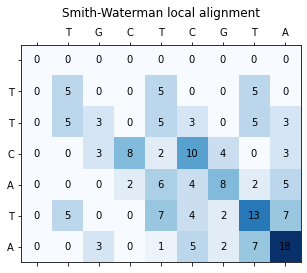

In [9]:
#smith-waterman test
Seq1=Seq('TTCATA')
Seq2=Seq('TGCTCGTA')
smith_waterman(Seq1,Seq2)